# **<span style = "color:#FF848F;">에이펙스 레전드</span> 프로리그 <span style = "color:#CD1F48;">ALGS</span>를 통한 교전이 최종점수에 미치는 영향분석**


>##### &nbsp;<br> **<span style = "color:#FF848F;">에이펙스 레전드</span>** 프로리그  <span style = "color:#CD1F48;">**ALGS**</span>에서는 <span style = "color:#FF7DB4;">킬 포인트</span>와 <span style = "color:#80E12A;">**등수 포인트**</span>의 합으로 최종점수를 결정한다.
>##### <span style = "color:#FF7DB4;">**킬 포인트**</span>는 1킬당 1점
>##### <span style = "color:#80E12A;">**등수 포인트**</span>는 1등 12점, 2등 9점, 3등 7점, 4등 5점, 5등 4점, 6~7등 3점, 8~10등 2점, 11~15등 1점, 그 외 0점이다
>##### <span style = "color:#FF8200;">**교전**</span>을 많이 하면 많이 할 수록 <span style = "color:#FF7DB4;">**킬 포인트**</span>를 얻을 가능성이 높아지지만, 반대로 <span style = "color:#FF8200;">**초반 교전**</span>에서의 사망으로 인해 <span style = "color:#80E12A;">**등수**</span>가 낮아질 위험이 있고, 후반부에 발생하는 <span style = "color:#FF8200;">**큰 교전**</span>에 참가하지 못해 <span style = "color:#FF7DB4;">**킬 포인트**</span>를 얻지 못할 가능성이 늘어난다
>##### 그렇다면 과연 <span style = "color:#FF8200;">**교전횟수**</span>가 많은 것이 <span style = "color:#C65FF9;">**최종 점수**</span>에 유리할까 불리할까?
>##### 이에 궁금증에 생겨 <span style = "color:#FF8200;">**교전횟수**</span>에 따른 <span style = "color:#FF7DB4;">**킬 포인트**</span>, <span style = "color:#80E12A;">**등수**</span> 그리고 <span style = "color:#C65FF9;">**최종 점수**</span> 간의 관계를 분석해보고자한다<br>&nbsp;

### * **가설 목록**

>#### &nbsp;<br> * **가설 1** : <span style = "color:#FF8200;">**교전횟수**</span>가 많을수록 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 높을것이다
>#### * **가설 2** : <span style = "color:#80E12A;">**등수**</span>가 높은 팀이 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 높을것이다
>#### * **가설 3** : 전체 교전중 <span style = "color:#FF8200;">**초반 교전의 비율**</span>이 높을수록 <span style = "color:#80E12A;">**등수**</span>가 낮을 것이다
>#### * **가설 4** : 전체 교전중 <span style = "color:#FF8200;">**초반 교전의 비율**</span>이 높은 팀이 <span style = "color:#C65FF9;">**최종 점수**</span>가 낮을 것이다
>#### * **가설 5** : <span style = "color:#FF8200;">**총교전횟수**</span>가 많은 팀이 <span style = "color:#C65FF9;">**최종 점수**</span>가 높을 것이다<br>&nbsp;

### * **데이터 추출 후 엑셀화**

>#### &nbsp;<br>데이터 원본은 ApexLegend 통계 사이트인 에이펙스레전드스테이터스(https://apexlegendsstatus.com/algs/)에서 추출하였다
>#### 자바 스크립트를 활용한 웹 페이지에서 데이터를 가져오기 때문에 **beautifulsoup** 대신 **selenium**을 사용해 **CSS_SELCTOR**와 **ID**를 활용하여 데이터를 추출하였고, 문자열 슬라이싱을 통해 원본 데이터더미에서 원하는 데이터를 뽑아내었다.
>#### 이후 **pandas** 모듈을 활용하여 데이터 분석을 하기 위해, **selenium**을 통해 뽑아낸 데이터들을 **openpxyl**을 통해 엑셀화 하였다.
>#### 엑셀화된 데이터의 행은 **팀별 이름**이며 각 엑셀별로 20팀이 존재한다.
>#### 데이터의 열의 이름은 각각 **팀 이니셜, 등수, 킬수, 교전 횟수, 초반 교전횟수, 전체 교전중 초반교전이 차지하는 비율, 최종점수**이다
>#### 원본 데이터에는 **초반 교전횟수, 전체 교전중 초반 교전이 차지하는 비율, 최종점수**가 존재하지 않았지만, 추후 진행될 데이터 분석에 필요하였기에 원본 데이터를 적절히 가공하여 원본 데이터와 함께 엑셀화시켰다<br>&nbsp;

### * **데이터 추출 후 엑셀화 코드**

In [1]:
""" 필요한 모듈과 드라이버 설치 """

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from openpyxl import Workbook
import time
import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

options = Options()
options.add_experimental_option('detach', True)
options.add_experimental_option('excludeSwitches', ['enable-logging'])
service = Service(ChromeDriverManager().install()) # 크롬 드라이버 자동 설치

In [2]:
""" 경기 오버뷰 정보 스크랩핑 """

def overview(url):
    wd_overview = webdriver.Chrome(service=service, options=options) # 크롬 드라이버를 이용해 url에 접속
    url_overview = url
    wd_overview.get(url_overview)
    time.sleep(5) # 사이트 접속 대기
    
    team_list = []
    kill_list = []
    rank_list = []
    mem_list = []
    score_list = []
    tem_list = []

    # 20개 팀의 팀명,이니셜,등수,킬수를 각각의 리스트에 순서대로 저장
    
    for i in range(22):
       team_name = wd_overview.find_elements(By.CSS_SELECTOR, '#sOteam-'+str(i)+'> div > div.col-11 > p > span.float-start')
       team_kill = wd_overview.find_elements(By.CSS_SELECTOR, '#dynamicStatsContainer_team_'+str(i)+' > span:nth-child(1) > span')
       team_rank = wd_overview.find_elements(By.ID, "statsOverviewData_teamRanking_"+str(i))
       team_mem = wd_overview.find_elements(By.CSS_SELECTOR, "#sOteam-"+str(i)+" > div > div.col-11 > div")

       for n in team_name:
           team_list.append(n.text)
       for n in team_kill:
           kill_list.append(n.text)
       for n in team_rank:
           rank_list.append(n.text)
       for n in team_mem:
           tem_list.append(n.text)

            
    for i in tem_list:
        mem_list.append(i.split("_")[0])
    
    # 위의 브라우저에서 받아온 등수와 킬수 정보를 활용하여 최종점수 리스트 완성

    for n in range(20):
        teamrank = int(rank_list[n][1:])
        kill = int(kill_list[n])
        if teamrank == 1:
            score_list.append(kill+12)
        elif teamrank == 2:
            score_list.append(kill+9)
        elif teamrank == 3:
            score_list.append(kill+7)
        elif teamrank == 4:
            score_list.append(kill+5)            
        elif teamrank == 5:
            score_list.append(kill+4)                
        elif teamrank < 8:
            score_list.append(kill+3)
        elif teamrank < 11:
            score_list.append(kill+2)
        elif teamrank < 16 :
            score_list.append(kill+1)
        else:
            score_list.append(kill+0)

    wd_overview.close() 

    return team_list, kill_list, rank_list, mem_list, score_list # 위에서 저장했던 리스트를 리턴


In [3]:
""" 경기 교전 정보 스크랩핑 """

def fight(url):

    wd_fights = webdriver.Chrome(service=service, options=options) # 크롬 드라이버를 이용해 url에 접속
    url_fights = url
    wd_fights.get(url_fights)
    time.sleep(9) # 사이트 접속 대기

    fight_list_1 = wd_fights.find_elements(By.CSS_SELECTOR, '#fb_list')

    for n in fight_list_1:
        count_fight = (n.text.count("Fight #")) # "Fight #n 꼴로 된 CSS 선택자를 받아와 "Fight #"의 수를 count_fight 변수에 저장"

    fight_list_a = []
    fight_list_b = []

    for i in range(2,count_fight+2):
        elem = wd_fights.find_elements(By.CSS_SELECTOR, '#fb_list > div:nth-child('+str(i)+') > div > div > div.col-sm-11 > div') # CSS 선택자를 받아와 "Fight #"의 수를 count_fight 변수에 저장"

        for n in elem:
            fight_list_a.append(n.text) # "  이니셜_선수명\n"의 형태가 반복되어있는 하나의 문자열을 fight_list_a에 저장

    # 위에서 저장했던 정보에서 팀이니셜만 남기고 전부 제거
    
    for i in fight_list_a:
        fight_list_b.extend(i.split("\n"))
    fight_list_a = []

    for i in fight_list_b:
        fight_list_a.extend(i.split("  "))
    fight_list_b = []

    for i in fight_list_a:
        if "_" in i:
            place = i.find("_")
            fight_list_b.append(i[:place])

    # 팀 이니셜과 팀별 교전 수를 딕셔너리 형태로 저장

    team_num = {}
    for i in fight_list_b:
        team_num[i] =  fight_list_b.count(i)

    # 전체 교전중 절반을 초반교전이라 가정 후 초반 교전에 대한 정보 스크랩핑

    fight_list_a_early = []
    fight_list_b_early = []

    for i in range(2,int(count_fight/2+2)):
        elem_early = wd_fights.find_elements(By.CSS_SELECTOR, '#fb_list > div:nth-child('+str(i)+') > div > div > div.col-sm-11 > div') 

        for n in elem_early:
            fight_list_a_early.append(n.text)
    
    # 초반 교전에 참가하지 않았던 팀도 있기 때문에 위에서 받아온 팀별 이니셜로 미리 딕셔너리 생성 후 초기값 0 설정
    
    team_names = team_num.keys()
    team_num_early = {}
    
    for s in team_names:
        team_num_early[s] = 0

    # 전체 교전에서 진행했던 작업 재수행

    for i in fight_list_a_early:
        fight_list_b_early.extend(i.split("\n"))
    fight_list_a_early = []

    for i in fight_list_b_early:
        fight_list_a_early.extend(i.split("  "))

    for i in fight_list_a_early:
        if "_" in i:
            place = i.find("_")
            fight_list_b_early.append(i[:place])
 
    for i in fight_list_b_early:
        team_num_early[i] =  fight_list_b_early.count(i)

    wd_fights.close() 
    
    return team_num, team_num_early # 전체 교전과 초반 교전에 대한 딕셔너리 리턴

In [4]:

""" 웹 페이지 스크롤링 후 엑셀 파일에 입력 """

# 사용할 링크와 라운드 명 리스트을 형태로 저장

link_Overview = ["https://apexlegendsstatus.com/algs/game/8774326490d1b62a89cdba2a957aaa9c/statsOverview","https://apexlegendsstatus.com/algs/game/70696c143a6f66120c1dc01f20d4bb1b/statsOverview","https://apexlegendsstatus.com/algs/game/dcf37db32f9c3db1e29a2980b3b9e342/statsOverview","https://apexlegendsstatus.com/algs/game/ff2664977d0fe38308a913290ce40a9d/statsOverview","https://apexlegendsstatus.com/algs/game/2279f7801395495e21bb4d748b3c3186/statsOverview","https://apexlegendsstatus.com/algs/game/c2b8097bb4f96a6c6fa35ba1dc087b91/statsOverview"]
link_fight = ["https://apexlegendsstatus.com/algs/game/8774326490d1b62a89cdba2a957aaa9c/fightsBreakdown","https://apexlegendsstatus.com/algs/game/70696c143a6f66120c1dc01f20d4bb1b/fightsBreakdown","https://apexlegendsstatus.com/algs/game/dcf37db32f9c3db1e29a2980b3b9e342/fightsBreakdown","https://apexlegendsstatus.com/algs/game/ff2664977d0fe38308a913290ce40a9d/fightsBreakdown","https://apexlegendsstatus.com/algs/game/2279f7801395495e21bb4d748b3c3186/fightsBreakdown","https://apexlegendsstatus.com/algs/game/c2b8097bb4f96a6c6fa35ba1dc087b91/fightsBreakdown"]
game_name = ["Winner_1","Winner_2","Winner_3","Winner_4","Winner_5","Winner_6"]

# 분석을 진행할 라운드의 수 만큼 overview와 fight함수 실행

for t in range(len(game_name)):

    team, kill, rank, ini, score= overview(link_Overview[t])
    team_num, team_num_early= fight(link_fight[t])

    final_list = []
    tem_list = []

    for i in range(len(ini)):
        tem_list.append(team[i])
        tem_list.append(ini[i])
        tem_list.append(rank[i][1:])
        tem_list.append(kill[i])
        tem_list.append(team_num[ini[i]]) # overview와 다르게 fight는 등수별 정렬이 되어있지 않으므로 딕셔너리의 키값을 이용해 저장
        tem_list.append(team_num_early[ini[i]])
        tem_list.append(team_num_early[ini[i]]/team_num[ini[i]])
        tem_list.append(score[i])
        tem_list_copy = copy.deepcopy(tem_list)
        final_list.append(tem_list_copy)
        tem_list = []

    # 위에서 완성한 리스트를 엑셀화

    wb = Workbook()
    ws = wb.active
    ws.title = game_name[t] # 엑셀 시트명을 game_name 리스트에서 받아옴

    wb.save(game_name[t]+".xlsx")  # 엑셀 파일명을 game_name 리스트에서 받아옴

    # 엑셀 열 별 입력할 항목명 기입
    
    cell_list = ["A","B","C","D","E","F","G","H"]
    ws["A1"] = "Teamname"
    ws["B1"] = "Initial"
    ws["C1"] = "Rank"
    ws["D1"] = "KillPoint"
    ws["E1"] = "BattleCount"
    ws["F1"] = "EarlyBattleCount"
    ws["G1"] = "EarlyBattleRate"
    ws["H1"] = "FinalScore"

    # 각 행에 팀별 정보를 입력

    for i in range(len(ini)):
        for n in range(len(cell_list)):
            ws[cell_list[n]+str(i+2)] = final_list[i][n]

    wb.save(game_name[t]+".xlsx") # 생성한 엑셀 파일을 저장

### **데이터 분석**

>#### &nbsp;<br> * **pandas 모듈을 활용한 데이터프레임화**
>##### 위에서 만든 엑셀파일을 **pandas** 모듈과 **seaborn**모듈을 통해 분석하기 위해 **pandas**로 호출하였다<br>또한 각 가설별 변수들간의 상관관계를 분석하여 아래 표에 따라 가설이 들어맞는 정도를 판단하였다
>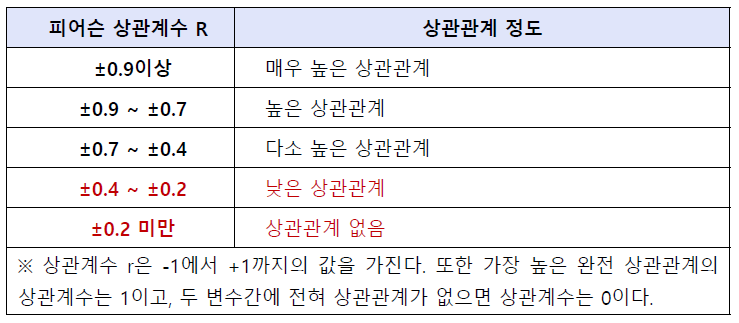<br>&nbsp;


In [5]:
# 엑셀파일 데이터 프레임화
game_name = ["Winner_1","Winner_2","Winner_3","Winner_4","Winner_5","Winner_6"]
r_list = []
for f_name in game_name:
    pd_r = pd.read_excel("./" + f_name + ".xlsx")
    r_list.append(pd_r)

### **호출된 데이터 확인**

In [6]:
r_list[0]

,Teamname,Initial,Rank,KillPoint,BattleCount,EarlyBattleCount,EarlyBattleRate,FinalScore
0,100Thieves,100T,11,2,16,4,0.250000,3
1,ACEND,ACE,2,5,15,3,0.200000,14
2,Alliance,ALL,6,2,15,1,0.066667,5
3,DarkZero,DZ,17,0,15,9,0.600000,0
4,Element6,E6,14,1,12,7,0.583333,2
5,ENTERFORCE.36,E36,16,2,16,11,0.687500,2
6,EsportsArena,ESA,13,7,11,5,0.454545,8
7,EXOClan,EXO,3,2,13,0,0.000000,9
8,FNATIC,FNC,8,1,19,7,0.368421,3
9,fun123,FUN,7,3,20,8,0.400000,6


In [7]:
r_list[1]

,Teamname,Initial,Rank,KillPoint,BattleCount,EarlyBattleCount,EarlyBattleRate,FinalScore
0,100Thieves,100T,5,6,13,7,0.538462,10
1,ACEND,ACE,20,0,3,3,1.000000,0
2,Alliance,ALL,6,5,16,2,0.125000,8
3,DarkZero,DZ,15,1,19,8,0.421053,2
4,Element6,E6,3,4,11,4,0.363636,11
5,ENTERFORCE.36,E36,16,1,12,7,0.583333,1
6,EsportsArena,ESA,17,0,7,2,0.285714,0
7,EXOClan,EXO,18,4,14,6,0.428571,4
8,FNATIC,FNC,7,2,12,6,0.500000,5
9,fun123,FUN,12,3,21,7,0.333333,4


In [8]:
r_list[2]

,Teamname,Initial,Rank,KillPoint,BattleCount,EarlyBattleCount,EarlyBattleRate,FinalScore
0,100Thieves,100T,14,1,10,5,0.500000,2
1,ACEND,ACE,15,3,19,12,0.631579,4
2,Alliance,ALL,13,4,13,5,0.384615,5
3,DarkZero,DZ,1,13,14,0,0.000000,25
4,Element6,E6,12,2,19,5,0.263158,3
5,ENTERFORCE.36,E36,4,0,14,3,0.214286,5
6,EsportsArena,ESA,20,0,6,6,1.000000,0
7,EXOClan,EXO,9,5,23,6,0.260870,7
8,FNATIC,FNC,7,4,16,9,0.562500,7
9,fun123,FUN,10,2,14,4,0.285714,4


In [9]:
r_list[3]

,Teamname,Initial,Rank,KillPoint,BattleCount,EarlyBattleCount,EarlyBattleRate,FinalScore
0,100Thieves,100T,20,0,10,10,1.000000,0
1,ACEND,ACE,10,3,13,3,0.230769,5
2,Alliance,ALL,17,0,14,9,0.642857,0
3,DarkZero,DZ,11,0,15,3,0.200000,1
4,Element6,E6,5,2,12,3,0.250000,6
5,ENTERFORCE.36,E36,12,3,14,9,0.642857,4
6,EsportsArena,ESA,1,10,20,3,0.150000,22
7,EXOClan,EXO,19,1,16,13,0.812500,1
8,FNATIC,FNC,13,0,10,4,0.400000,1
9,fun123,FUN,2,3,14,0,0.000000,12


In [10]:
r_list[4]

,Teamname,Initial,Rank,KillPoint,BattleCount,EarlyBattleCount,EarlyBattleRate,FinalScore
0,100Thieves,100T,10,1,7,1,0.142857,3
1,ACEND,ACE,14,3,11,4,0.363636,4
2,Alliance,ALL,1,8,17,3,0.176471,20
3,DarkZero,DZ,16,0,4,1,0.250000,0
4,Element6,E6,4,11,18,4,0.222222,16
5,ENTERFORCE.36,E36,13,2,10,5,0.500000,3
6,EsportsArena,ESA,5,7,17,3,0.176471,11
7,EXOClan,EXO,6,2,20,3,0.150000,5
8,FNATIC,FNC,18,0,8,4,0.500000,0
9,fun123,FUN,17,0,8,5,0.625000,0


In [11]:
r_list[5]

,Teamname,Initial,Rank,KillPoint,BattleCount,EarlyBattleCount,EarlyBattleRate,FinalScore
0,100Thieves,100T,13,0,6,2,0.333333,1
1,ACEND,ACE,1,9,18,6,0.333333,21
2,Alliance,ALL,5,5,8,1,0.125000,9
3,DarkZero,DZ,20,0,7,7,1.000000,0
4,Element6,E6,4,5,7,2,0.285714,10
5,ENTERFORCE.36,E36,11,0,11,5,0.454545,1
6,EsportsArena,ESA,18,0,15,6,0.400000,0
7,EXOClan,EXO,9,1,9,5,0.555556,3
8,FNATIC,FNC,10,5,8,0,0.000000,7
9,fun123,FUN,3,1,19,8,0.421053,8


#### * **<span style = "color:#00AFFF">가설 1 데이터분석</span>**
>##### &nbsp; <br>**가설1** : <span style = "color:#FF8200;">**교전횟수**</span>가 많을수록 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 높을것이다 <br>
>##### <span style = "color:#FF7DB4;">**킬 포인트**</span>는 최종 점수에 큰 영향을 미치는 요소이며, <span style = "color:#80E12A;">**등수**</span>보다 직관적으로 확인하기 어렵기 때문에 <span style = "color:#FF7DB4;">**킬 포인트**</span>에서부터 분석을 시작하는 것이 옳다고 생각하였다<br> 따라서 <span style = "color:#FF8200;">**교전횟수**</span>가 많을수록 킬 포인트를 얻을 수 있는 기회가 더 많기 때문에 따라서 <span style = "color:#FF8200;">**교전횟수**</span>와 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 비례하는 경향을 보일것이라는 가설을 세웠다<br>&nbsp;

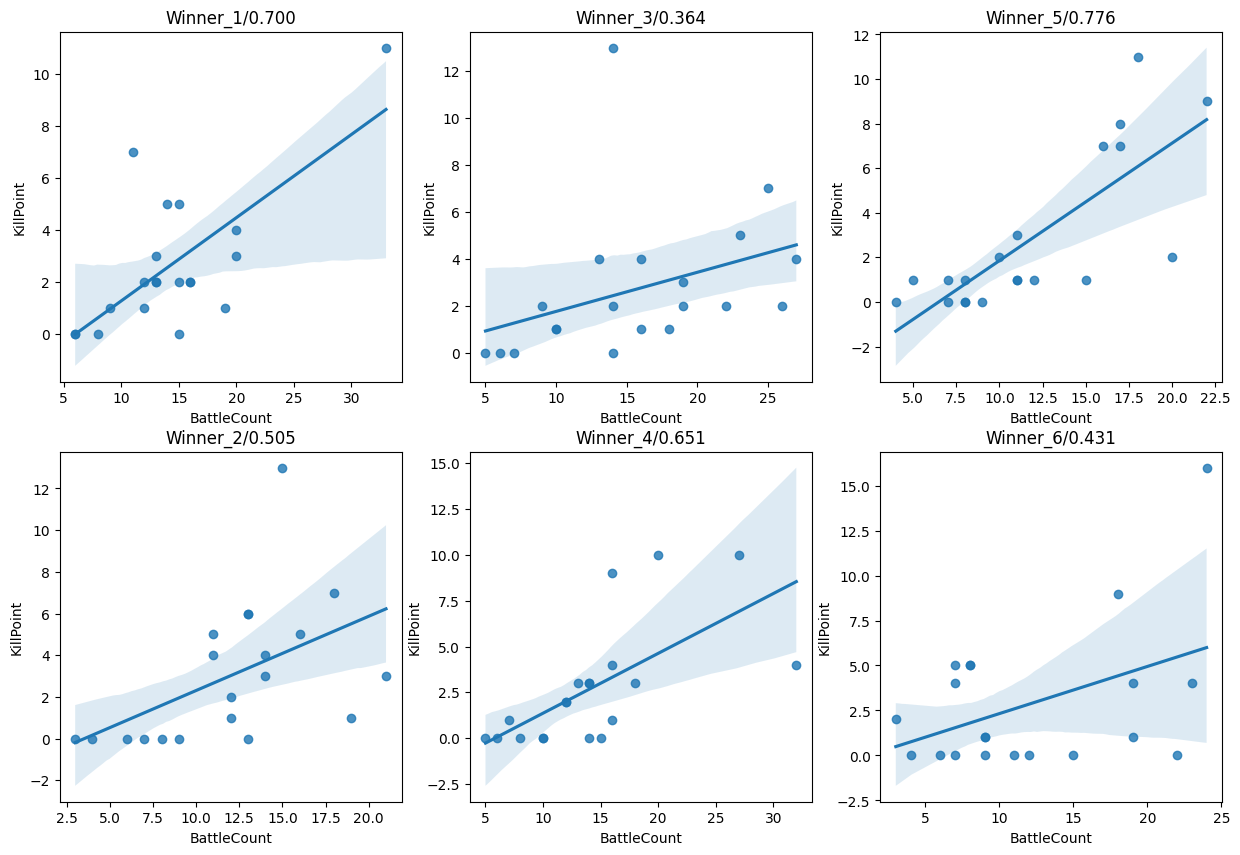

In [12]:
# 개별 경기별 그래프와 교전횟수와 킬포인트의 상관관게
fig, ax = plt.subplots(2, 3, figsize=(15,10))

for c in range(3):
    for r in range(2):
      num_point = r_list[r+2*c][['BattleCount','KillPoint']]
      p = sns.regplot(x = 'BattleCount',y = 'KillPoint',ax=ax[r,c],data = num_point)
      cor_3 = str(num_point.corr().iloc[0,1])[0:5]
      p.set_title(game_name[r+2*c]+"/"+cor_3)

Text(0.5, 1.0, 'Total/0.571')

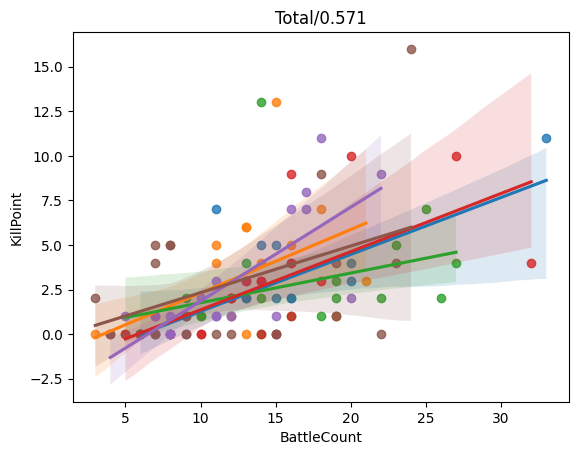

In [13]:
# 전체 경기의 상관관계 그래프
tem = 0
for i in range(len(r_list)):
    num_point = r_list[i][['BattleCount','KillPoint']]
    tem += num_point.corr().iloc[0,1]
    p = sns.regplot(x = 'BattleCount',y = 'KillPoint',data = num_point)
cor_3 = str(tem/6)[0:5]
p.set_title("Total/"+cor_3)


#### * **<span style = "color:#00AFFF">가설 1 데이터분석결과</span>**

>##### &nbsp;<br><span style = "color:#FF8200;">**교전횟수**</span>와 <span style = "color:#FF7DB4;">**킬 포인트**</span>에 대한 데이터를 분석해본 결과 모든 경기의 그래프가 우 상향하는 가설과 어느정도 일치하는 경향을 가졌다.
>##### 또한 각 경기별 <span style = "color:#FF8200;">**교전횟수**</span>와 <span style = "color:#FF7DB4;">**킬 포인트**</span>의 **상관계수**를 분석해봤을때 상관관계표에 따르면,높은 상관관계였던 경기가 **1회**, 다소 높은 상관관계를 가졌던 경기가 **4회**, 낮은 상관관계를 가졌던 경기가, **1회**였으며, 모든 경기의 평균 상관계수는 **0.571**로 <span style = "color:#FF8200;">**교전횟수**</span>와 <span style = "color:#FF7DB4;">**킬 포인트**</span>는 다소 높은 상관관계를 가진 것을 알 수 있었다.
>#### 따라서 **가설1** : "<span style = "color:#FF8200;">**교전횟수**</span>가 많을수록 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 높을것이다"는 어느정도 성립한다는 결론을 도출할 수 있었다<br>&nbsp;


#### * **<span style = "color:#00AFFF">가설 2 데이터분석</span>**
>##### &nbsp;<br>**가설 2** : <span style = "color:#80E12A;">**등수**</span>가 높은 팀이 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 높을것이다<br>
>##### <span style = "color:#80E12A;">**등수**</span>가 높은 팀은 <span style = "color:#80E12A;">**등수**</span>가 낮은 팀에 비해 더 오래 생존하기 때문에 더 많은 교전 기회를 가질것이다.</br>가설 1에서 증명된 것처럼 <span style = "color:#FF8200;">**교전횟수**</span>가 많을수록 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 높을 가능성이 크기 때문에 따라서 <span style = "color:#80E12A;">**등수**</span>가 높은 팀은 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 높을 것이라는 가설을 세웠다<br>&nbsp;

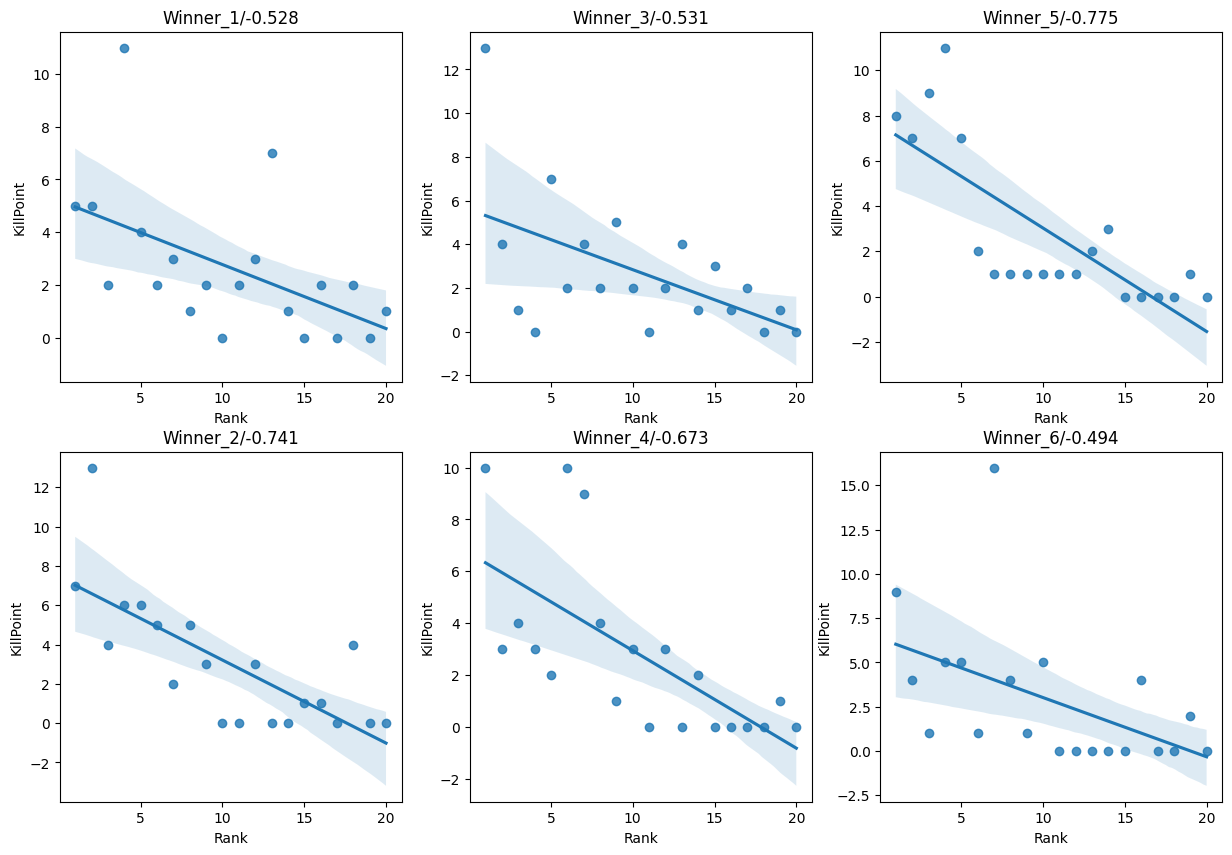

In [14]:
# 개별 게임별 그래프와 등수와 킬포인트의 상관관게
fig, ax = plt.subplots(2, 3, figsize=(15,10))

for c in range(3):
    for r in range(2):
      num_point = r_list[r+2*c][['Rank','KillPoint']]
      p = sns.regplot(x = 'Rank',y = 'KillPoint', ax = ax[r,c],data = num_point)
      cor_3 = str(num_point.corr().iloc[0,1])[0:6]
      p.set_title(game_name[r+2*c]+"/"+cor_3)

Text(0.5, 1.0, 'Total/-0.624')

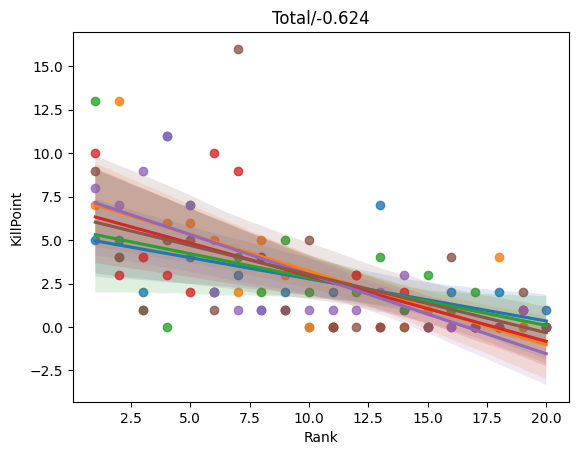

In [15]:
# 개별 경기별 그래프 합산
tem = 0
for i in range(len(r_list)):
    num_point = r_list[i][['Rank','KillPoint']]
    tem += num_point.corr().iloc[0,1]
    p = sns.regplot(x = 'Rank',y = 'KillPoint',data = num_point)
cor_3 = str(tem/6)[0:6]
p.set_title("Total/"+cor_3)


#### * **<span style = "color:#00AFFF">가설 2 데이터분석결과 </span>**

>##### &nbsp;<br><span style = "color:#80E12A;">**등수**</span>와 <span style = "color:#FF7DB4;">**킬 포인트**</span>에 대한 데이터를 분석해본 결과 모든 경기의 그래프가 우 하향하는 가설과 어느정도 일치하는 경향을 보였다.
>##### 또한 각 경기별 <span style = "color:#80E12A;">**등수**</span>와 <span style = "color:#FF7DB4;">**킬 포인트**</span>의 **상관계수**를 분석해봤을때, 상관관계표에 따르면,높은 상관관계를 가졌던 경기가 **2회**, 다소 높은 상관관계를 가졌던 경기가 **4회**였으며,<br> 모든 경기의 평균 상관계수의 절댓값은 **0.624**로 <span style = "color:#80E12A;">**등수**</span>와 <span style = "color:#FF7DB4;">**킬 포인트**</span>의 관계는 **가설 1**의 <span style = "color:#FF7DB4;">**킬 포인트**</span>와 "<span style = "color:#FF8200;">**교전횟수**</span>의 관계 보다도 더 상관성이 높은 것을 알 수 있었다
>#### 따라서 **가설 2** : "<span style = "color:#80E12A;">**등수**</span>가 높은 팀이 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 높을것이다"는 높은 확률로 성립한다는 결론을 도출할 수 있었다<br>&nbsp;


#### * **<span style = "color:#00AFFF">가설 3 데이터분석**</span>
>##### &nbsp;<br>**가설 3** : 전체 교전중 <span style = "color:#FF8200;">**초반 교전의 비율**</span>이 높을수록 <span style = "color:#80E12A;">**등수**</span>가 낮을 것이다
>##### <span style = "color:#FF8200;">**초반 교전**</span>을 많이 할 경우 탈락할 확률이 높아지며 또한 교전마다 회복 아이템의 소모로 추후 발생할 교전에서 불리함을 갖게 된다 <br>따라서 전체 교전중 <span style = "color:#FF8200;">**초반 교전의 비율**</span>이 높은 팀은 <span style = "color:#80E12A;">**등수**</span>가 낮을 것이라는 가설을 세웠다<br>&nbsp;

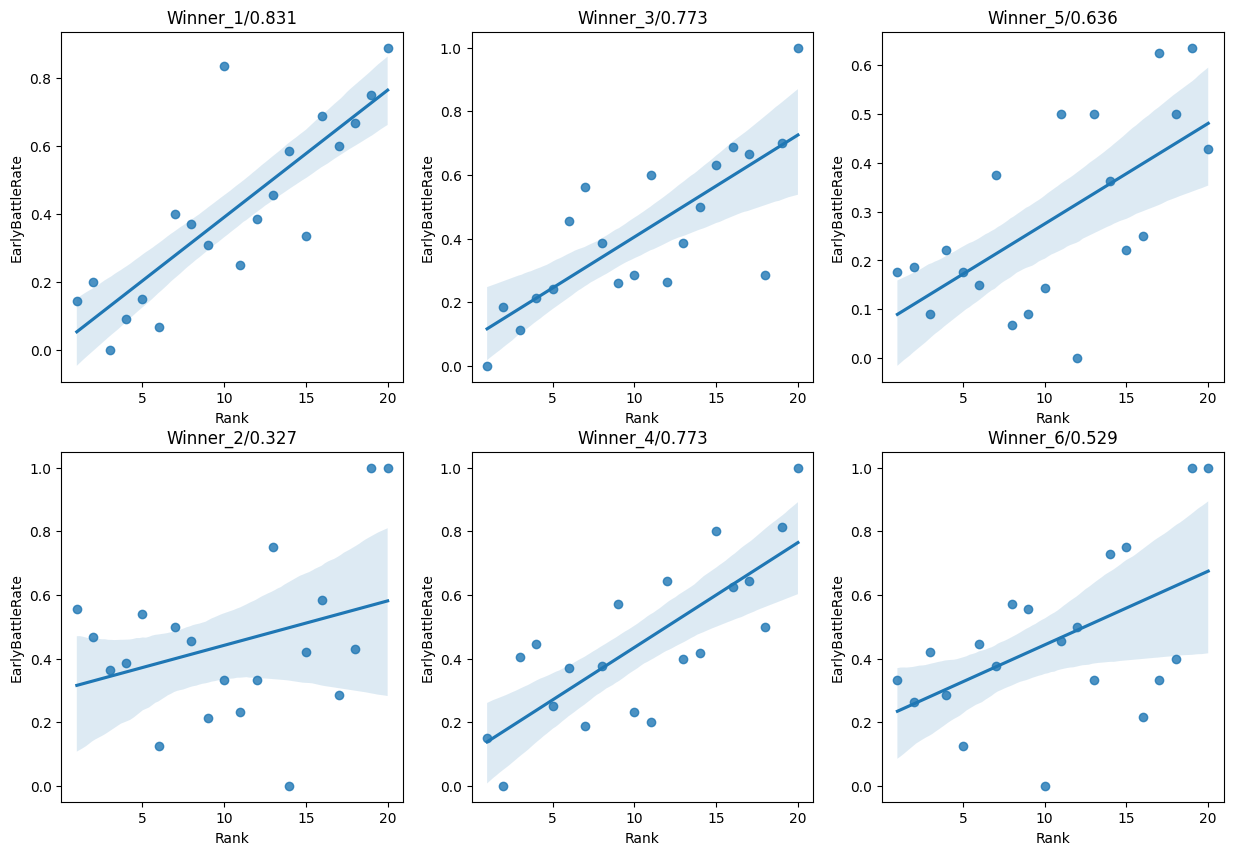

In [16]:
# 개별 게임별 그래프와 초반교전의 비율과 등수의 상관관게
fig, ax = plt.subplots(2, 3, figsize=(15,10))

for c in range(3):
    for r in range(2):
      num_point = r_list[r+2*c][['EarlyBattleRate','Rank']]
      p = sns.regplot(x = 'Rank',y = 'EarlyBattleRate', ax = ax[r,c],data = num_point)
      cor_3 = str(num_point.corr().iloc[0,1])[0:5]
      p.set_title(game_name[r+2*c]+"/"+cor_3)

Text(0.5, 1.0, 'Total/0.645')

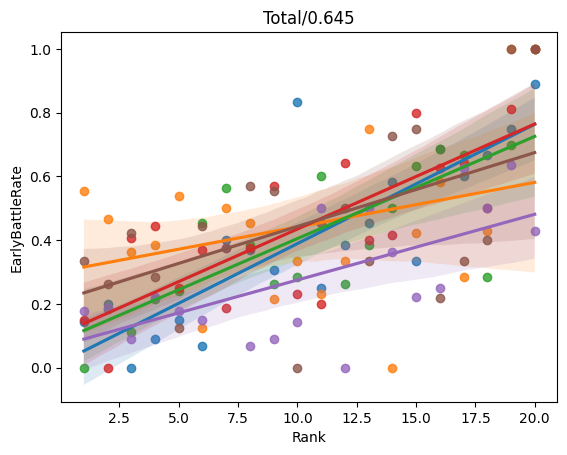

In [17]:
# 개별 경기별 그래프 합산
tem = 0
for i in range(len(r_list)):
    num_point = r_list[i][['EarlyBattleRate','Rank']]
    tem += num_point.corr().iloc[0,1]
    p = sns.regplot(x = 'Rank',y = 'EarlyBattleRate',data = num_point)
cor_3 = str(tem/6)[0:5]
p.set_title("Total/"+cor_3)

#### * **<span style = "color:#00AFFF">가설 3 데이터분석결과 </span>**

>##### &nbsp;<br> <span style = "color:#FF8200;">**초반 교전**</span>과 <span style = "color:#80E12A;">**등수**</span>에 대한 데이터를 분석해본 결과 모든 경기의 그래프가 우 상향하는 가설과 어느정도 일치하는 경향을 보였다.
>##### 또한 각 경기별 <span style = "color:#80E12A;">**등수**</span>와 <span style = "color:#FF7DB4;">**킬 포인트**</span>의 **상관계수**를 분석해봤을때, 상관관계표에 따르면,높은 상관관계를 가졌던 경기가 **3회**, 다소 높은 상관관계를 가졌던 경기가 **2회**, 낮은 상관관계를 가졌던 경기가 **1회** 였으며,<br> 모든 경기의 평균 상관계수의 절댓값은 **0.645**로 가설1, 가설2보다 더 높은 상관관계를 가진다는 것을 알 수 있었다.
>#### 따라서 **가설 3** : "<span style = "color:#FF8200;">**초반 교전의 비율**</span>과 <span style = "color:#80E12A;">**등수**</span>가 낮을 것이다"는 높은 확률로 성립한다는 결론을 도출할 수 있었다<br>&nbsp;


#### * **<span style = "color:#00AFFF">가설 4 데이터분석**</span>
>##### &nbsp;<br>**가설 4** : 전체 교전중 <span style = "color:#FF8200;">**초반 교전의 비율**</span>이 높은 팀이 <span style = "color:#C65FF9;">**최종 점수**</span>가 낮을 것이다
>##### ALGS의 주요 교전들은 주로 게임 후반부에 발생하며, 그 교전들에서 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 많이 발생한다 또한 가설 3의 결론에 따라 <span style = "color:#FF8200;">**초반 교전의 비율**</span>이 높은 팀의 <span style = "color:#80E12A;">**등수**</span>가 낮을 확률이 높기 때문에 <span style = "color:#FF7DB4;">**킬 포인트**</span>도 <span style = "color:#80E12A;">**등수**</span>도 낮은 <span style = "color:#FF8200;">**초반 교전의 비율**</span>이 높은 팀은 <span style = "color:#C65FF9;">**최종 점수**</span>가 낮을 것이다 라는 가설을 세웠다<br>&nbsp;

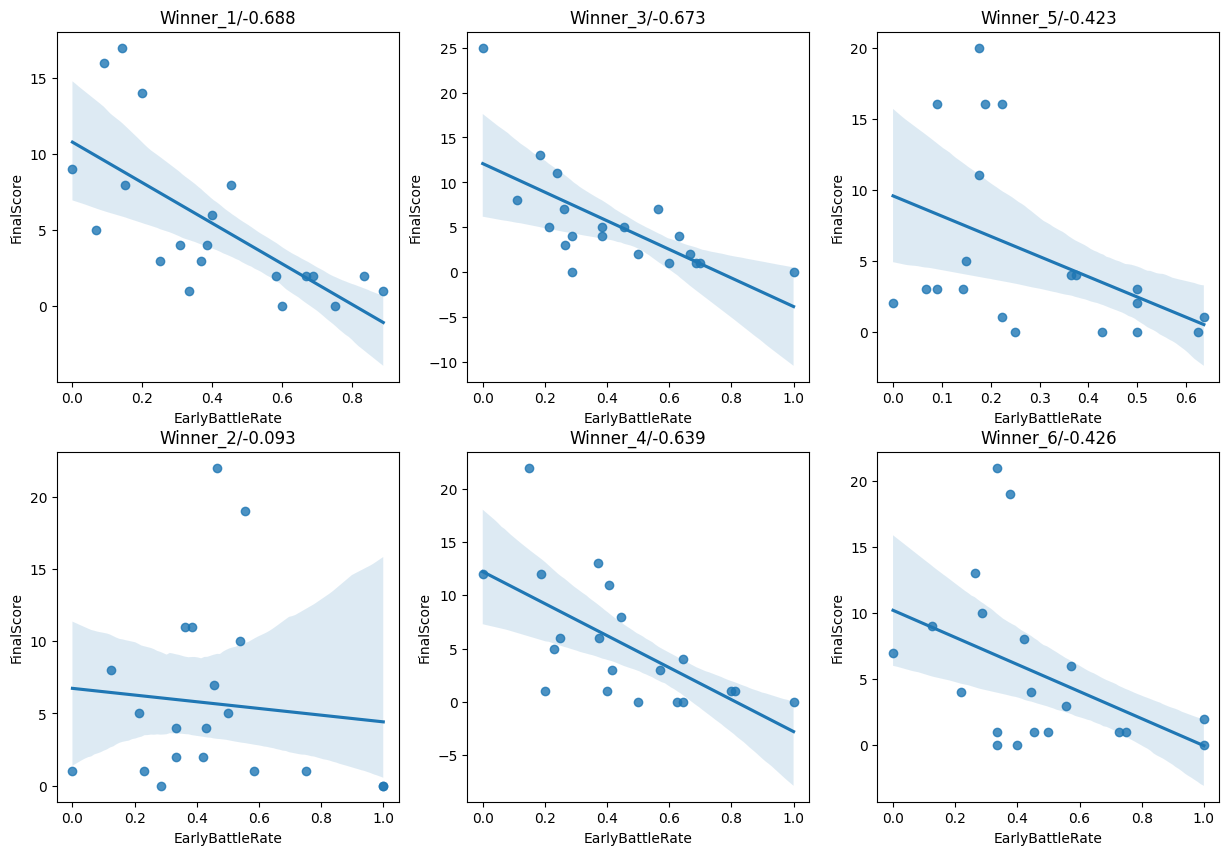

In [18]:
# 개별 게임별 그래프와 초반교전의 비율과 최종점수의 상관관게
fig, ax = plt.subplots(2, 3, figsize=(15,10))

for c in range(3):
    for r in range(2):
      num_point = r_list[r+2*c][['EarlyBattleRate','FinalScore']]
      p = sns.regplot(x = 'EarlyBattleRate',y = 'FinalScore', ax = ax[r,c],data = num_point)
      cor_3 = str(num_point.corr().iloc[0,1])[0:6]
      p.set_title(game_name[r+2*c]+"/"+cor_3)

Text(0.5, 1.0, 'Total/-0.490')

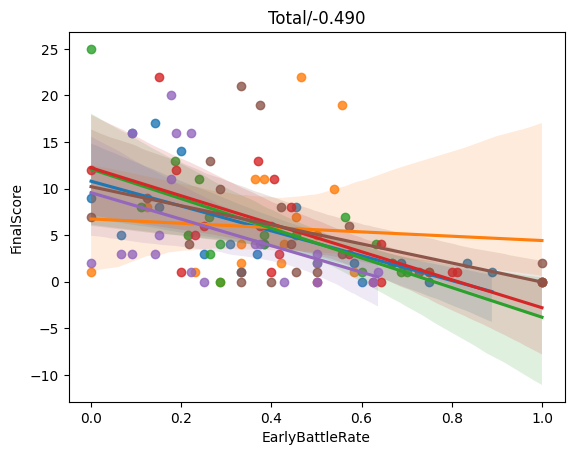

In [19]:
# 개별 경기별 그래프 합산
tem = 0
for i in range(len(r_list)):
    num_point = r_list[i][['EarlyBattleRate','FinalScore']]
    tem += num_point.corr().iloc[0,1]
    p = sns.regplot(x = 'EarlyBattleRate',y = 'FinalScore',data = num_point)
cor_3 = str(tem/6)[0:6]
p.set_title("Total/"+cor_3)

#### * **<span style = "color:#00AFFF">가설 4 데이터분석결과 </span>**

>##### &nbsp;<br><span style = "color:#FF8200;">**초반 교전**</span>과 <span style = "color:#C65FF9;">**최종 점수**</span>에 대한 데이터를 분석해본 결과 모든 경기의 그래프가 우 하향하는 가설과 어느정도 일치하는 경향을 보였다.<br> 다만, 2번째 경기에서 상관계수의 절대값이 0.1 미만으로 나오며 다른 가설들에 비해 상관성이 상당히 떨어지는 결과가 나왔다
>##### 또한 각 경기별 <span style = "color:#FF8200;">**초반 교전**</span>와 <span style = "color:#C65FF9;">**최종 점수**</span>의 **상관계수**를 분석해봤을때, 상관관계표에 따르면,높은 상관관계를 가졌던 경기는 존재하지 않았으며, 다소 높은 상관관계를 가졌던 경기가 **5회**, 상관관계가 거의 없는 경기가 **1회** 였으며, 모든 경기의 평균 상관계수의 절댓값은 **0.490**으로 다른 가설들의 상관계수에 비해 상당히 낮은 값을 가졌다.
>#### 따라서 "**가설 4** : 전체 교전중 <span style = "color:#FF8200;">**초반 교전의 비율**</span>이 높은 <span style = "color:#C65FF9;">**최종 점수**</span>가 낮을 것이다"는 어느정도 성립하긴 하지만 두 구성요소의 관계가 다른 가설들에 비해 약하다는 결론을 도출할 수 있었다<br>&nbsp;

#### * **<span style = "color:#00AFFF">가설 5 데이터분석**</span>
>##### &nbsp;<br>**가설 5** : <span style = "color:#FF8200;">**총교전횟수**</span>가 많은 팀이 <span style = "color:#C65FF9;">**최종 점수**</span>가 높을 것이다
>##### 가설 1,2,3,4의 가정과 분석 결과 그리고 ALGS의 점수 산출방식에 따르면, <span style = "color:#FF8200;">**초반 교전**</span>이 적을수록 <span style = "color:#80E12A;">**등수**</span>가 높으며, <span style = "color:#FF8200;">**교전횟수**</span>가 많을수록 <span style = "color:#FF7DB4;">**킬 포인트**</span>가 높다고 예상할 수 있다.<br> 또한 경기 후반에 일어나는 규모가 큰 교전에 참가할 수 있기 때문에 <span style = "color:#FF7DB4;">**킬 포인트**</span>를 많이 얻을 수 있을 가능성이 높으며, 이는 <span style = "color:#C65FF9;">**최종 점수**</span>에 직결된다.<br> 따라서 <span style = "color:#FF8200;">**총교전횟수**</span>가 많을수록 <span style = "color:#C65FF9;">**최종 점수**</span>가 높아진다 가설을 세웠다.<br>&nbsp;

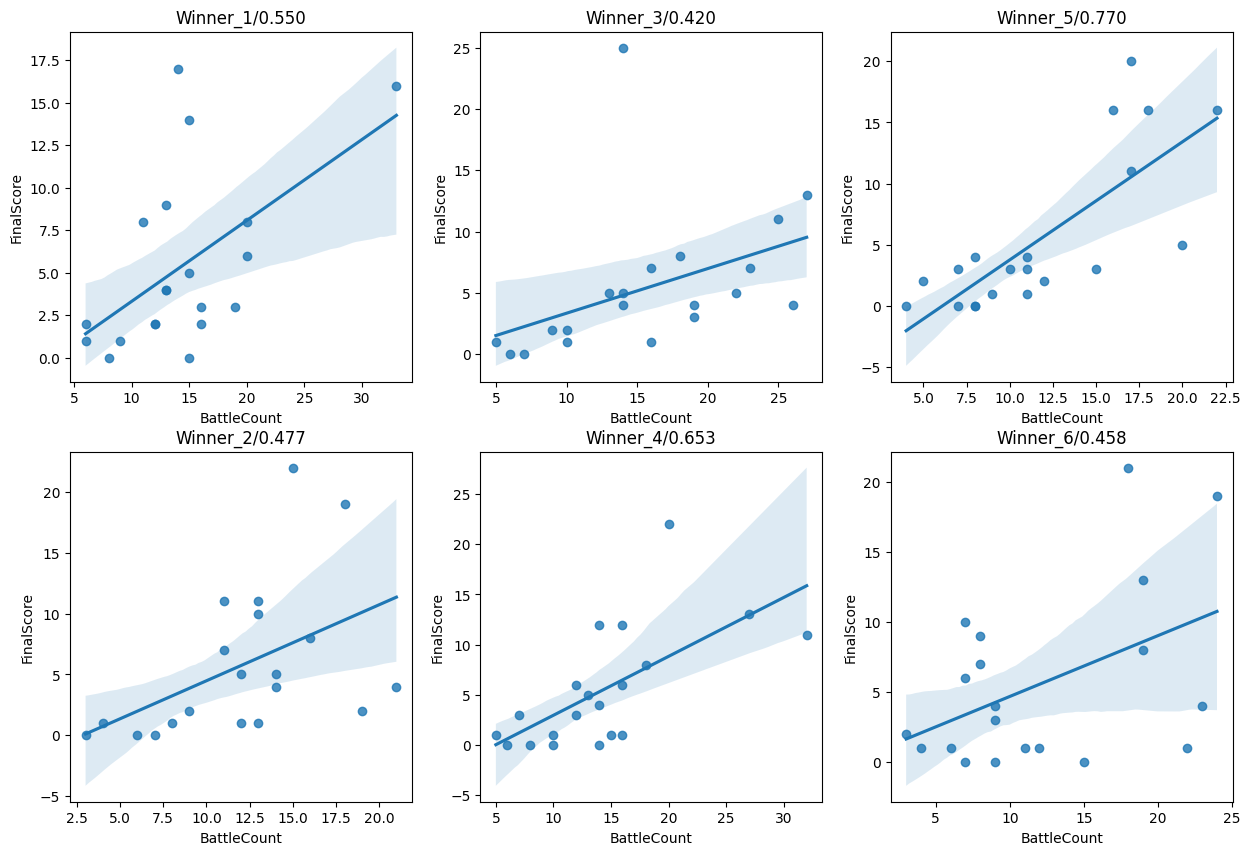

In [20]:
# 개별 게임별 그래프와 총 교전횟수와 최종점수의 상관관게
fig, ax = plt.subplots(2, 3, figsize=(15,10))

for c in range(3):
    for r in range(2):
      num_point = r_list[r+2*c][['BattleCount','FinalScore']]
      p = sns.regplot(x = 'BattleCount',y = 'FinalScore', ax = ax[r,c],data = num_point)
      cor_3 = str(num_point.corr().iloc[0,1])[0:5]
      p.set_title(game_name[r+2*c]+"/"+cor_3)

Text(0.5, 1.0, 'Total/0.555')

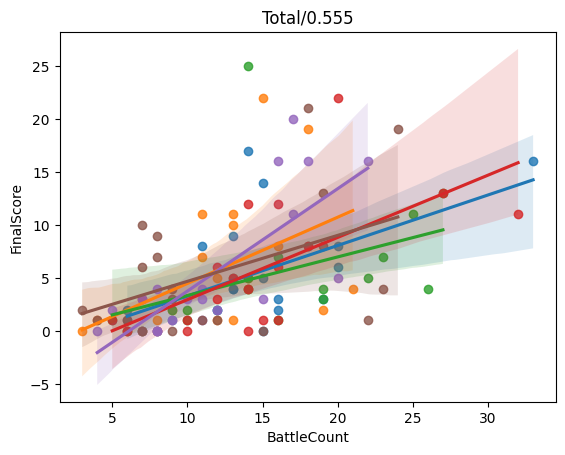

In [21]:
# 개별 경기별 그래프 합산
tem = 0
for i in range(len(r_list)):
    num_point = r_list[i][['BattleCount','FinalScore']]
    tem += num_point.corr().iloc[0,1]
    p = sns.regplot(x = 'BattleCount',y = 'FinalScore',data = num_point)
cor_3 = str(tem/6)[0:5]
p.set_title("Total/"+cor_3)

#### * **<span style = "color:#00AFFF">가설 5 데이터분석결과 </span>**

>##### &nbsp;<br><span style = "color:#FF8200;">**총교전횟수**</span>와 <span style = "color:#C65FF9;">**최종 점수**</span>에 대한 데이터를 분석해본 결과 모든 경기의 그래프가 우 상향하는 가설과 어느정도 일치하는 경향을 보였다.<br>또한 모든 경기에서 0.4 이상의 상관계수를 보여주며 상당히 관련성이 높다는 것을 알 수 있었다.
>##### 각 경기별 <span style = "color:#FF8200;">**총교전횟수**</span>와 <span style = "color:#C65FF9;">**최종 점수**</span>의 **상관계수**를 분석해봤을때 상관관계표에 따르면 **1경기**에서 높은 상관관계를 가졌으며, 나머지 **5경기**에서 다소 높은 상관관계를 보여주었다. 또한 모든 경기의 평균 상관계수의 절댓값은 **0.555**로 다소 높은 상관관계를 가지고 있다고 판단할 수 있었다.
>#### 따라서 "**가설 5** : <span style = "color:#FF8200;">**총교전횟수**</span>가 많은 팀이 <span style = "color:#C65FF9;">**최종 점수**</span>가 높을 것이다"는 꽤 많은 경우에서 높은 확률로 성립한다는 것을 알 수 있었다.<br>&nbsp;

### * **최종 결론**

>##### &nbsp;<br> **가설 4**를 분석해 본 결과 <span style = "color:#FF8200;">**초반 교전**</span>이 잦으면 잦을수록 <span style = "color:#80E12A;">**등수**</span>가 낮아져 <span style = "color:#C65FF9;">**최종 점수**</span>가 낮아질 확률이 높아진다는 것을 알 수 있었다.<br> 그러나 다른 가설에 비해 **가설 4**의 두 요소간 상관성이 낮았는데 이는 **가설 5**의 <span style = "color:#FF8200;">**총교전횟수**</span>와 관련이 있다고 생각한다.<br> <span style = "color:#FF8200;">**초반 교전**</span> 또한 총 교전횟수이며, 초반 교전에서 큰 사고나 아이템 소비 없이 승리할 경우 <span style = "color:#FF7DB4;">**킬 포인트**</span>와 적팀의 아이템 또한 획득할 수 있기 때문이라 생각한다.<br> 또한 APEXLEGEND의 시스템 중 체력을 일부 대체하는 이보 실드가 데미지에 비례하여 업그레이드 되기 때문에 **가설 4**가 다른 가설들에 비해 신뢰도가 낮았다고 생각한다.
>##### 하지만 이러한 <span style = "color:#FF8200;">**초반 교전의**</span>의 이점이 존재함에도 불구하고 **가설 3**을 분석할때, <span style = "color:#FF8200;">**초반 교전 비율**</span>이 높을수록 등수가 낮았던 것을 생각해보면, <span style = "color:#FF8200;">**초반 교전** </span>의 이점보다 리스크가 훨씬 크다는 것을 알 수 있었다.<br> 결국 1등의 점수인 12점은 <span style = "color:#FF7DB4;">**킬 포인트**</span> 12개와 동일한데 프로리그 수준의 경기에서 그정도의 <span style = "color:#FF7DB4;">**킬 수**</span>를 내는것은 상당히 어렵기 때문이다. 
>##### 따라서 **가설1~5**를 종합해봤을때, 최대한 <span style = "color:#FF8200;">**초반 교전**</span>을 지양하며, <span style = "color:#80E12A;">**등수**</span>를 보전해 후반에 열리는 <span style = "color:#FF8200;">**많은 교전**</span>에 참가하는 것이 **가설1,가설2**의 분석에 따른 많은 <span style = "color:#FF8200;">**교전횟수**</span> , 높은 <span style = "color:#80E12A;">**등수**</span>로 많은 <span style = "color:#FF7DB4;">**킬 포인트**</span>를 챙길 수 있는 지름길이라고 생각한다.<span style = "color:#FF8200;">**초반 교전** </span>의 리스크를 줄이며, 후반까지 버텨 <span style = "color:#FF7DB4;">**킬 포인트**</span>와 <span style = "color:#80E12A;">**등수 점수**</span>를 챙길 수 있는 확률이 높기 때문이다. <br> 결국 <span style = "color:#FF7DB4;">**킬 포인트**</span>와 <span style = "color:#80E12A;">**등수**</span> 두 요소가 최종점수 더 나아가서는 우승을 결정짓기 때문에 우승을 할 가능성을 늘리기 위해선 <span style="font-size:130%"><span style = "color:#FF82FF;">**초반 교전 을 지양하는 것**</span></span>이 옳다고 생각한다.
>##### 그러나 전체적인 통계가 그러한 경향성을 보였을뿐, 모든 경기에서 이러한 경향성에서 벗어나는 데이터들이 보였고, 심지어 **WINNER_2**처럼 <span style = "color:#FF8200;">**초반 교전** </span> 순위가 **4등**인 팀이 **1위**를 차지한 케이스도 존재한다. 이러한 전체적인 경향성에 벗어나는 데이터가 생기는 이유는 <span style = "color:#FF848F;">**에이펙스 레전드**</span>의 장르에 원인이 있다고 생각한다. <span style = "color:#FF848F;">**에이펙스 레전드**</span>의 장르는 배틀로얄이다. 후반에 많은 <span style = "color:#FF8200;">**교전** </span>이 발생하지만 후반에 발생하는 <span style = "color:#FF8200;">**교전** </span>들은 <span style = "color:#FF8200;">**초반에 발생하는 교전**</span>보다 좁은 지역에서 더 많은 팀들이 참여한다. 결국 난전이 발생할 수 밖에 없는 상황이 만들어지고 큰 피해를 입어 탈락할 가능성이 높아진다. 이렇기 때문에 **WINNER_2**의 우승팀처럼 초반에 탈락할 리스크가 존재하지만, 교전 자체의 리스크는 낮은 <span style = "color:#FF8200;">**초반 교전** </span>에서 어떻게든 승리하여 <span style = "color:#FF7DB4;">**킬 포인트**</span>를 챙긴 후 버티는 흔히들 말하는 "존버"를 하여, <span style = "color:#C65FF9;">**최종 점수**</span>를 올리는 전략도 유효하다고 생각한다.<br>&nbsp;


### * **데이터 출처**
>##### &nbsp;<br>ALGS Playoffs Split 1 - Day 3 Winners Round 1
>###### GAME1 https://apexlegendsstatus.com/algs/game/8774326490d1b62a89cdba2a957aaa9c/statsOverview, https://apexlegendsstatus.com/algs/game/8774326490d1b62a89cdba2a957aaa9c/fightsBreakdown
>###### GAME2 https://apexlegendsstatus.com/algs/game/70696c143a6f66120c1dc01f20d4bb1b/statsOverview, https://apexlegendsstatus.com/algs/game/70696c143a6f66120c1dc01f20d4bb1b/fightsBreakdown
>###### GAME3 https://apexlegendsstatus.com/algs/game/dcf37db32f9c3db1e29a2980b3b9e342/statsOverview, https://apexlegendsstatus.com/algs/game/dcf37db32f9c3db1e29a2980b3b9e342/fightsBreakdown
>###### GAME4 https://apexlegendsstatus.com/algs/game/ff2664977d0fe38308a913290ce40a9d/statsOverview, https://apexlegendsstatus.com/algs/game/ff2664977d0fe38308a913290ce40a9d/fightsBreakdown
>###### GAME5 https://apexlegendsstatus.com/algs/game/2279f7801395495e21bb4d748b3c3186/statsOverview, https://apexlegendsstatus.com/algs/game/2279f7801395495e21bb4d748b3c3186/fightsBreakdown
>###### GAME6 https://apexlegendsstatus.com/algs/game/c2b8097bb4f96a6c6fa35ba1dc087b91/statsOverview, https://apexlegendsstatus.com/algs/game/c2b8097bb4f96a6c6fa35ba1dc087b91/fightsBreakdown 
>###### &nbsp;

### * **참고 문헌**
>#### &nbsp;<br> selenium 모듈 사용법<br>https://wikidocs.net/137914
>#### seaborn 모듈 사용법<br>https://dining-developer.tistory.com/30
>#### pandas 모듈 강의<br>https://khcanvas.khu.ac.kr/courses/47097/external_tools/2
>#### 상관관계표<br>https://bioinformaticsandme.tistory.com/58
>#### 16진수 컬러코드표<br>https://www.ltool.net/html-color-charts-rgb-color-table-in-korean.php
>#### 마크다운 사용법<br>https://ingu627.github.io/md/markdown_grammar/<br> &nbsp;

### * **데이터 추출 엑셀 파일 차트**

>#### &nbsp;<br>* **Winner_1**
>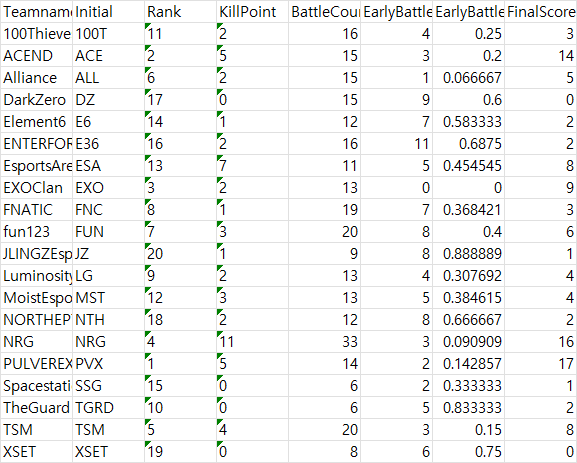
>#### * **Winner_2**
>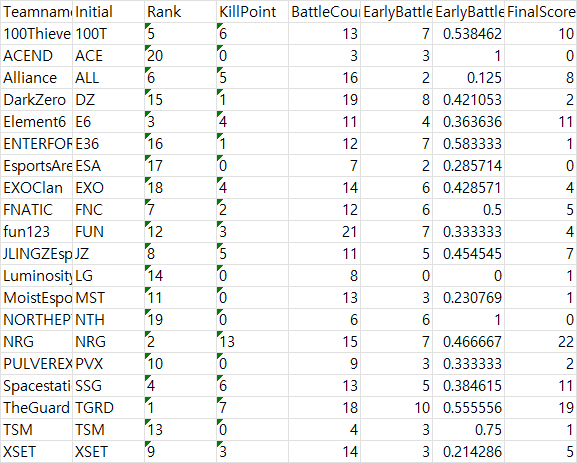
>#### * **Winner_3**
>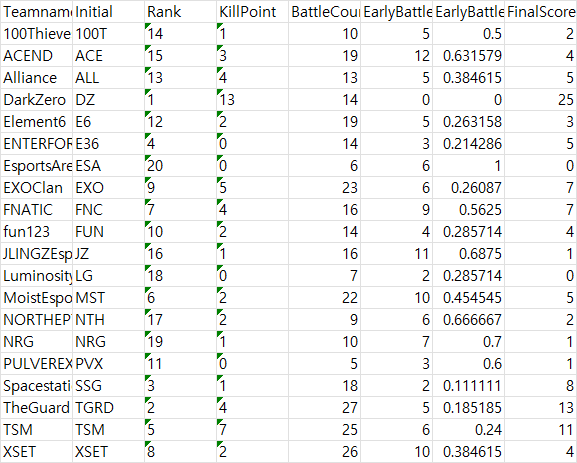
>#### * **Winner_4**
>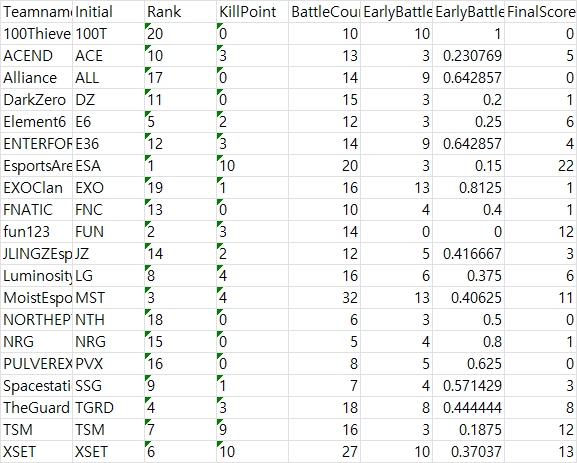
>#### * **Winner_5**
>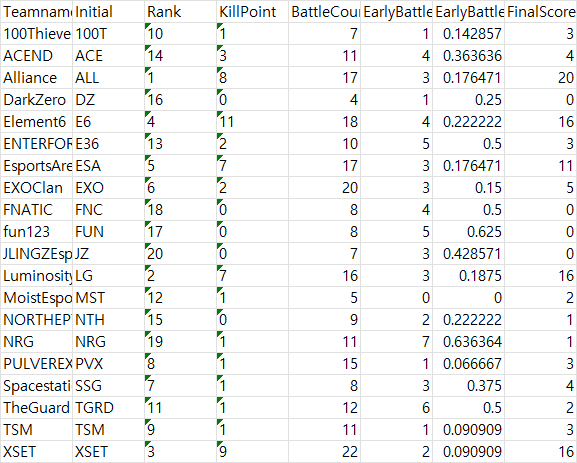
>#### * **Winner_6**
>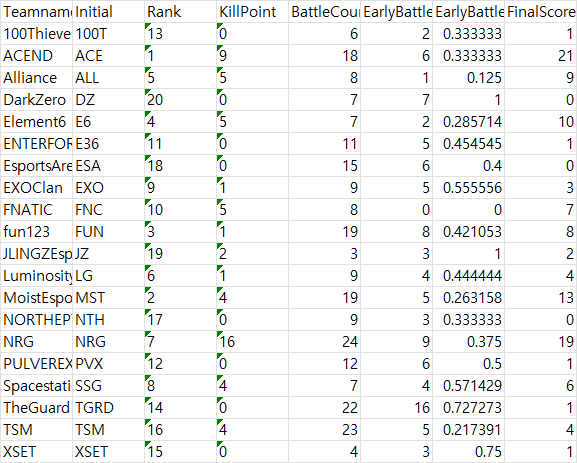<br> &nbsp;


### * **데이터 원본 예시**
>#### &nbsp;<br>* Overview 데이터 원본 예시
>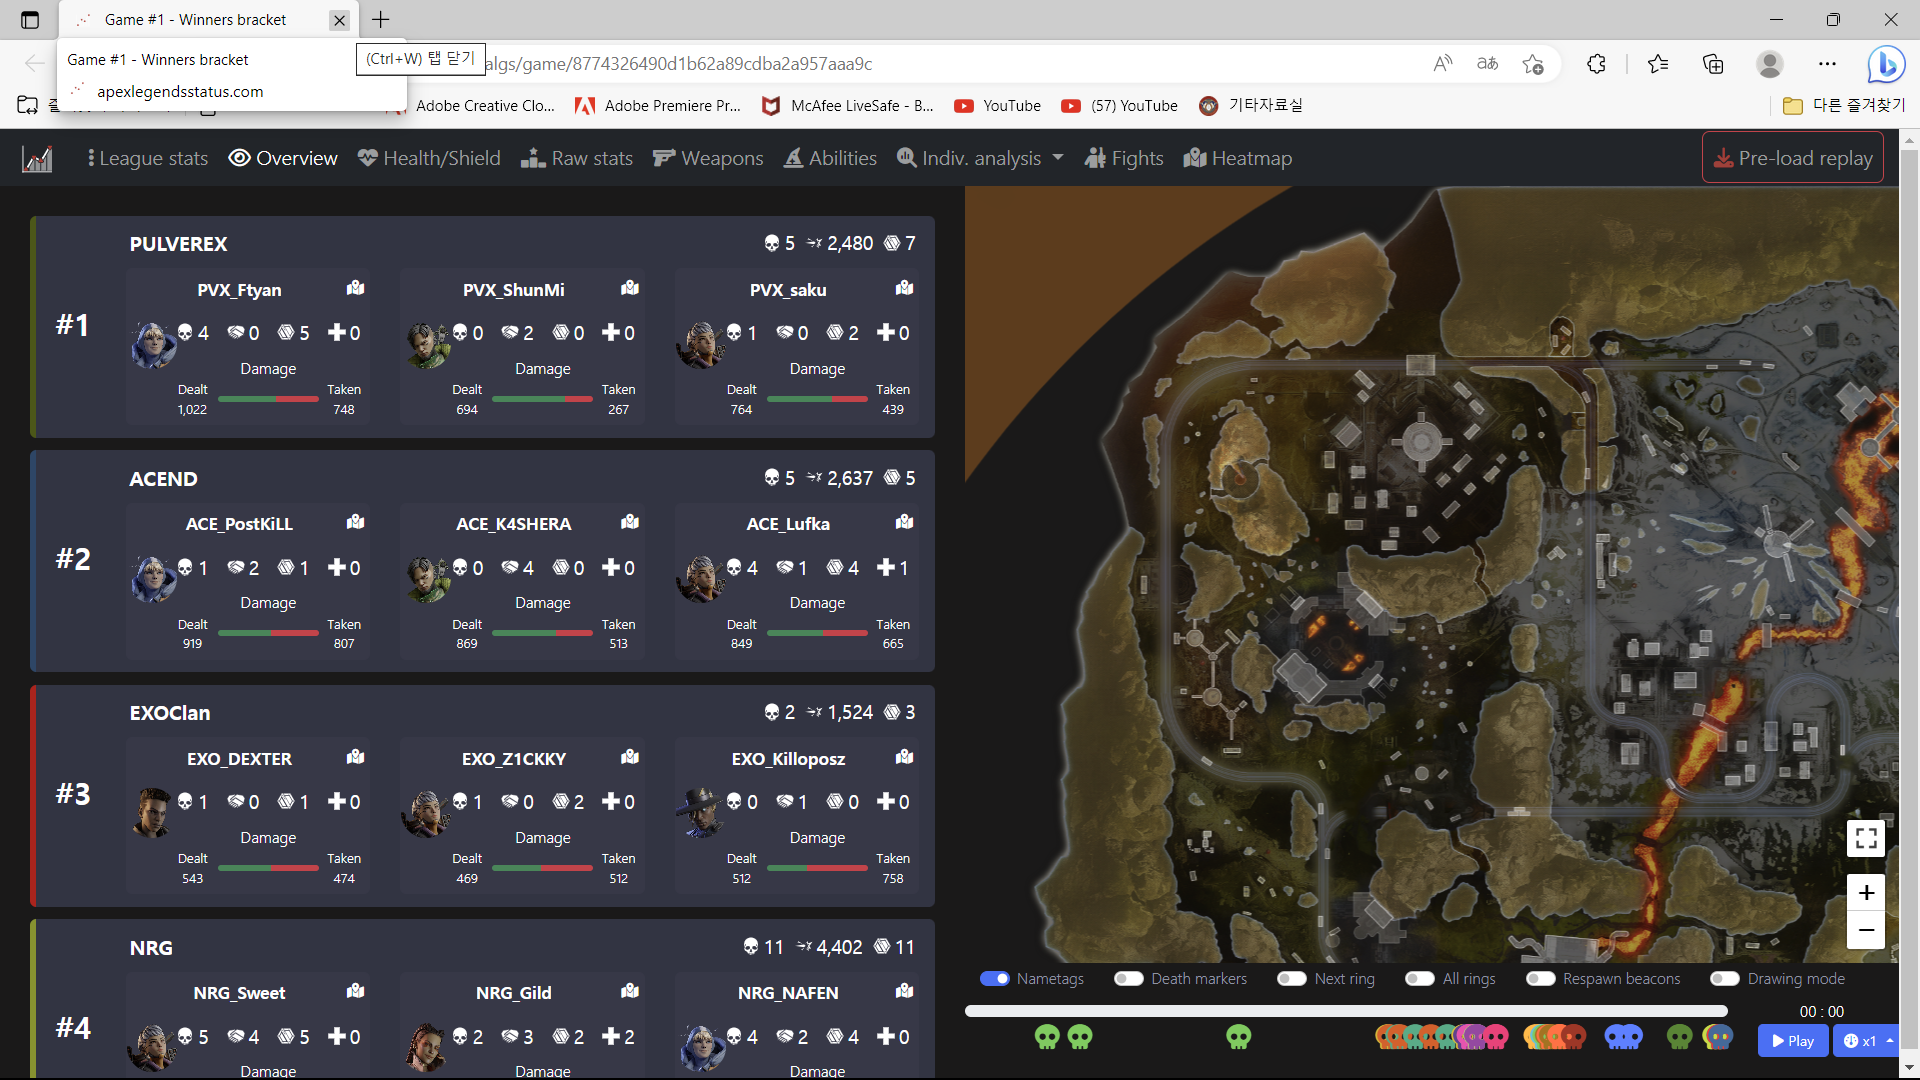
>#### * fightBreakdown 데이터 원본 예시
>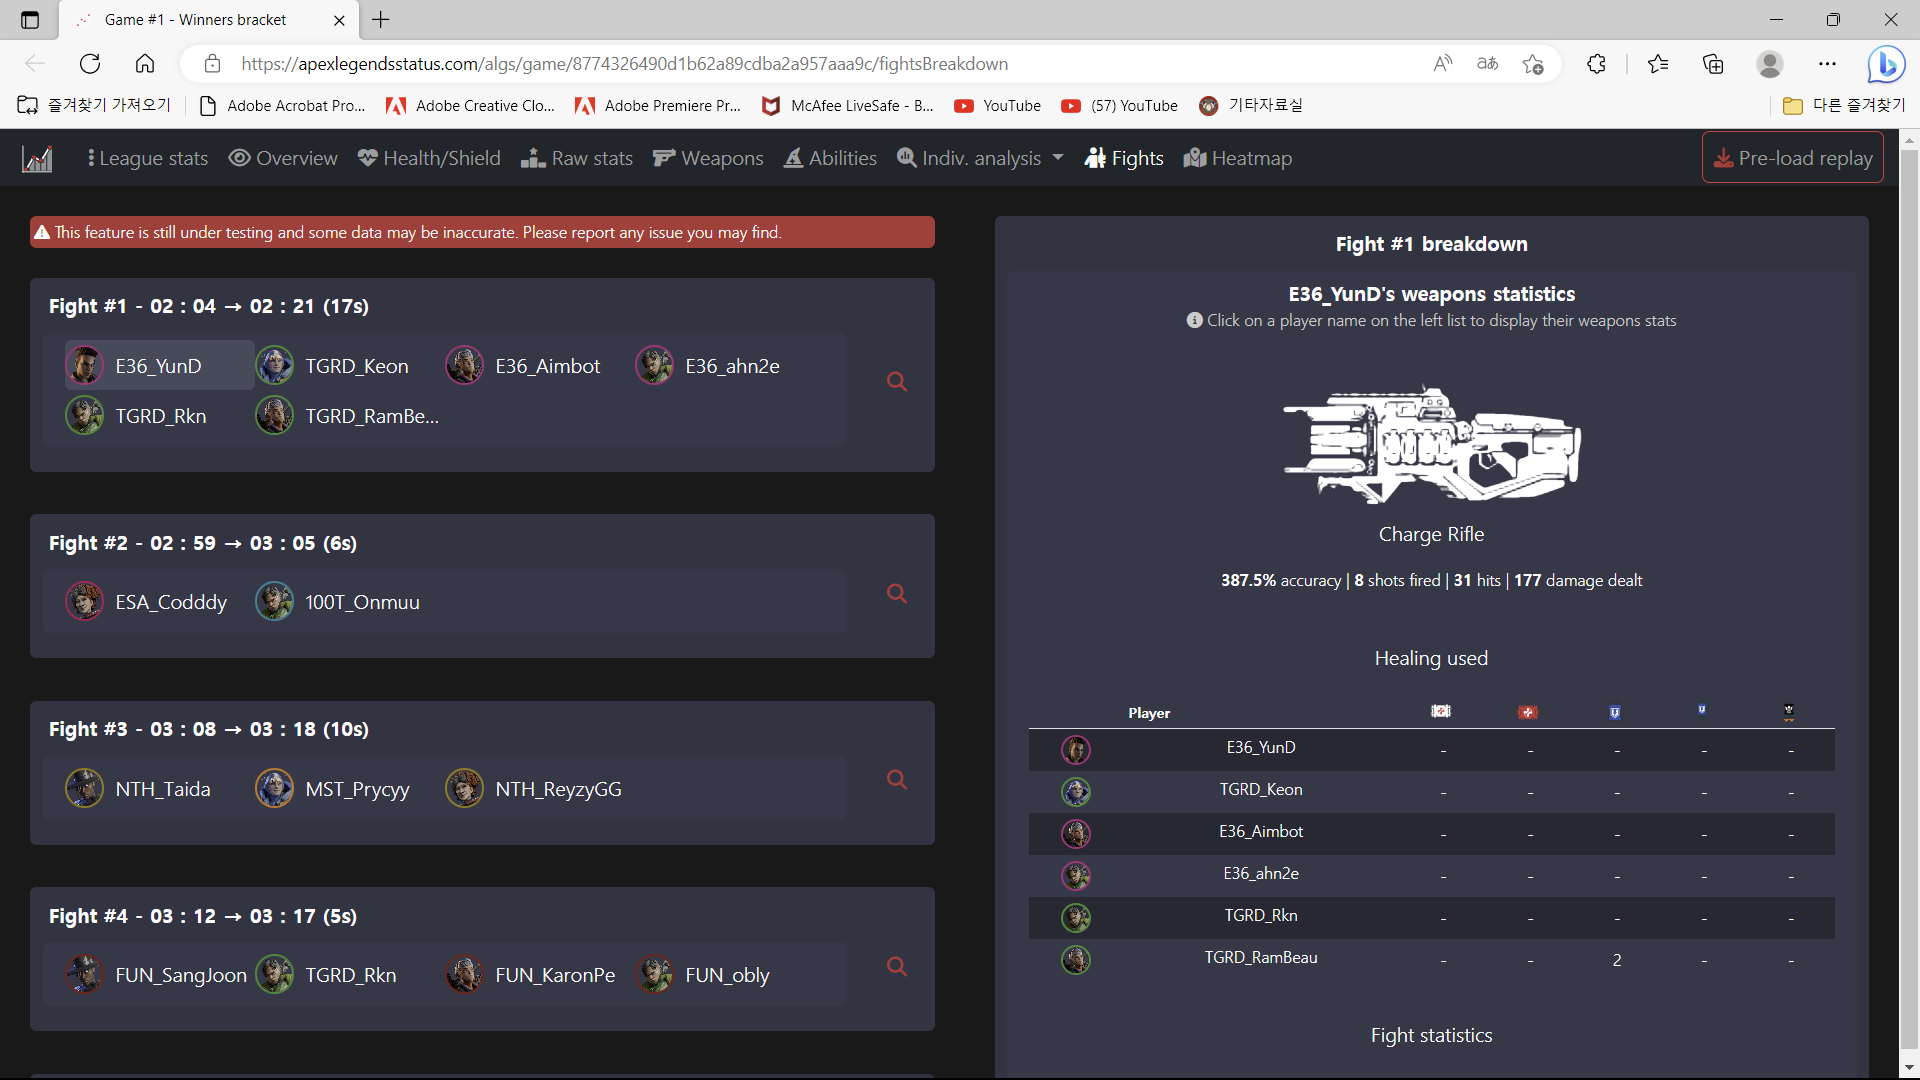<br>&nbsp;